<a href="https://colab.research.google.com/github/Girish-yml/notebooks/blob/main/SentimentAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prompt Stuffing

###### 
<b>Prompt stuffing</b> is the practice of adding additional information to a prompt in order to influence the output of a large language model (LLM). This additional information can be anything from keywords to examples to constraints. The goal of prompt stuffing is to give the LLM more clues about what you are looking for, so that it can generate more accurate and relevant output.
<br/>Keywords : love, hear, romance
<br/>Examples : <i>sounds like a Shakespearean sonnet</i>
<br/>Constraints : <i>poem should be no more than 100 words long</i>
<br/>Negative Examples : <i>love that does not mention words like John , Mary.<i>
<br/>
<br/>For ex: 
* Regular prompt   <i>Write a poem about love.</i>
* Prompt with promopt stuffing   <i>Write a poem about love that sounds like a Shakespearean sonnet.</i> 
<br>In this case, the additional information is the phrase "sounds like a Shakespearean sonnet." This phrase tells the LLM that the poem should have a specific structure and style. As a result, the LLM is more likely to generate a poem that is accurate and relevant to the request.

<b>Prompt engineering</b>  Prompt engineering is a broader term that refers to the process of designing and optimizing prompts for LLMs.Prompt stuffing is a subset of prompt engineering.

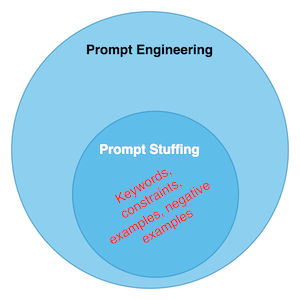

# Utility

In [ ]:
!pip install torch
!pip install cryptography
!pip install psutil

In [28]:
# %%writefile app.py

""" A Utility calss which contains most commonly used functions """

import psutil
import torch
import functools
import socket
import cryptography
import cryptography.fernet
import openai
import os

class Utility(object):

  def __init__(self, name="Utility") -> None:
    self.name = name
    self.author = "Duc Haba, Girish"
    self._pp("Hello from class", str(self.__class__) + " Class: " + str(self.__class__.__name__))
    self._pp("Code name", self.name)

    #Define encrypted keys
    self._huggingface_key="gAAAAABkgtmOIjpnjwXFWmgh1j2et2kMjHUze-ym6h3BieAp34Sqkqv3EVYvRinETvpw-kXu7RSRl5_9FqrYe-7unfakMvMkU8nHrfB3hBSC76ZTXwkVSzlN0RfBNs9NL8BGjaSJ8mz8"
    
    self._gpt_key="'gAAAAABkgtoTOLPegnxNIAfBfAda17h5HIHTS_65bobO3SdDlJam07AHGrcolvk9c6IWNJtTTxaCb8_JtWnLz0Y5h9doyfL-nJZggeQ6kLtaD4XwZYcG-AtYNNGCnJzVt9AaysPDnu-KWVhnJSe-DyH0oOO33doE0g=='"

    #Key for crypto
    self._fkey="=cvsOPRcWD6JONmdr4Sh6-PqF6nT1InYh965mI8f_sef"#os.getenv("hf_encrypt_decrypt_key")
    return

  # Print : Pretty print output name-value line
  def _pp(self, a, b,is_print=True):
    # print("%34s : %s" % (str(a), str(b)))
    x = f'{"%34s" % str(a)} : {str(b)}'
    y = None
    if (is_print):
      print(x)
    else:
      y = x
    return y

  # Print : Pretty print the header or footer lines
  def _ph(self,is_print=True):
    x = f'{"-"*34} : {"-"*34}'
    y = None
    if (is_print):
      print(x)
    else:
      y = x
    return y

  # Create and writes data to the file
  def write_file(self,fname, txt):
    f = open(fname, "w")
    f.writelines("\n".join(txt))
    f.close()
    return

  # Crypto : Fetch crypto key
  def _fetch_crypt(self,is_generate=False):
    s=self._fkey[::-1]
    if (is_generate):
      s=open(self._xkeyfile, "rb").read()
    return s

  # Crypto : Decrypt value
  def _decrypt_it(self, x):
    y = self._fetch_crypt()
    f = cryptography.fernet.Fernet(y)
    m = f.decrypt(x)
    return m.decode()

  # Crypto : Encrypt value
  def _encrypt_it(self, x):
    key = self._fetch_crypt()
    p = x.encode()
    f = cryptography.fernet.Fernet(key)
    y = f.encrypt(p)
    return y

  def _setup_openai(self,key=None):
    if (key is None):
      key = self._decrypt_it(self._gpt_key)
    #
    openai.api_key = key
    os.environ["OPENAI_API_KEY"] = key
    return

# Add method to class
def add_method(cls):
  def decorator(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
      return func(*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator


In [ ]:
!pip install scipy
!pip install line_profiler
!pip install openai

In [ ]:
# %%writefile -a app.py

from langchain import OpenAI

class PromptStuffing(object):

  # initialize the object
  def __init__(self, name="Pitch",*args, **kwargs):
    super(PromptStuffing, self).__init__(*args, **kwargs)
    self.author = "Girish"
    self.name = name
    utility = Utility(name="Calling From PromptStuffing")
    self.utility = utility
    utility._ph()
    utility._pp("Hello from class", str(self.__class__) + " Class: " + str(self.__class__.__name__))
    utility._pp("Code name", self.name)
    utility._pp("Author is" , self.author)
    utility._ph()
    utility._ph()
    utility._setup_openai()
    return

  def _fetch_data(prompt_value):
    try:
      response = openai.Completion.create(  
        model="text-davinci-003",
        prompt = prompt_value,
        max_tokens=100
      )
      print(response)
    except Exception as e:
      print("***ERROR: \n", e)
      print("\n*Solution:\nIf it is about the incorrect Key, then generate a new OpenAI key for it.")

pitch = PromptStuffing(name="Prompt Stuffing")

##### Without prompt stuffing

In [47]:
PromptStuffing._fetch_data("Write a poem about love")

{
  "id": "cmpl-7bnCjl6zqpYATS6BNZPV1IZnO3RUo",
  "object": "text_completion",
  "created": 1689241633,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nLove, an emotion so strong\nA power that lasts so long\nA feeling no one can ignore\nEven when you lock and close your door\n\nLove, what some have called a game\nWhich can drive one mad in shame\nIt penetrates deep within the soul\nAnd enlightens our existence as a whole\n\nLove, a flame that cannot diminish\nNo amount of hate can extinguish\nAs the breeze carries its warmth\nIt illuminates a blissful harmony\n",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 5,
    "completion_tokens": 100,
    "total_tokens": 105
  }
}


#### With prompt stuffing

In [48]:
PromptStuffing._fetch_data("Write a poem about love that sounds like a Shakespearean sonnet.")

{
  "id": "cmpl-7buFUosP3amQlXlus8hciFS6ZJSEk",
  "object": "text_completion",
  "created": 1689268712,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nI.\nMy love for you is like a diamond, true and bright,\nYour beauty entrancing, a sight so rare and fine;\nIts flame burns ever onward through my day and night,\nIn this love, I\u2019ve never been so truly entwined.\n\nII.\nYour heart my sweetest love, like a million stars shine,\nEvery kiss between us, a dance upon the sky;\nWhen near, my soul free and joyous",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 14,
    "completion_tokens": 100,
    "total_tokens": 114
  }
}
